<a href="https://colab.research.google.com/github/Bix4UMD/BIOI611_lab/blob/main/docs/BIOI611_DESeq2_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of RNA-seq data using R

## Navigation in the file system and read the count files


In [3]:
getwd()

[1] "/content"

In [4]:
list.files()

[1] "sample_data"

In [5]:
# Define base URL and files to download
base_url <- "https://raw.githubusercontent.com/Bix4UMD/BIOI611_lab/refs/heads/main/data/bulkRNA_SE_tab/"
files <- c("N2_day1_rep1.ReadsPerGene.out.tab",
           "N2_day1_rep2.ReadsPerGene.out.tab",
           "N2_day1_rep3.ReadsPerGene.out.tab",
           "N2_day7_rep1.ReadsPerGene.out.tab",
           "N2_day7_rep2.ReadsPerGene.out.tab",
           "N2_day7_rep3.ReadsPerGene.out.tab"
           )

# Download each file
for (f in files) {
  download.file(paste0(base_url, f), destfile = f, method = "libcurl")
}

In [6]:
list.files()

[1] "N2_day1_rep1.ReadsPerGene.out.tab" "N2_day1_rep2.ReadsPerGene.out.tab"
[3] "N2_day1_rep3.ReadsPerGene.out.tab" "N2_day7_rep1.ReadsPerGene.out.tab"
[5] "N2_day7_rep2.ReadsPerGene.out.tab" "N2_day7_rep3.ReadsPerGene.out.tab"
[7] "sample_data"

In [7]:
file_paths <- list.files(pattern = "*.ReadsPerGene.out.tab")
file_paths

[1] "N2_day1_rep1.ReadsPerGene.out.tab" "N2_day1_rep2.ReadsPerGene.out.tab"
[3] "N2_day1_rep3.ReadsPerGene.out.tab" "N2_day7_rep1.ReadsPerGene.out.tab"
[5] "N2_day7_rep2.ReadsPerGene.out.tab" "N2_day7_rep3.ReadsPerGene.out.tab"

In [8]:
# Function to read the STAR ReadsPerGene.out.tab file
read_star_file <- function(file_path) {
  # Read the file
  df <- read.table(file_path, header = FALSE, stringsAsFactors = FALSE)

  # Keep only the first (gene) and second (unstranded counts) columns
  library(dplyr)
  df <- df %>% select(V1, V2)

  # Rename the columns for clarity (GeneID and counts for this sample)
  colnames(df) <- c("GeneID", gsub(".ReadsPerGene.out.tab", "", basename(file_path)))

  return(df)
}

# Read all files into a list of data frames
list_of_dfs <- lapply(file_paths, read_star_file)

# Merge all data frames by the GeneID column
merged_df <- Reduce(function(x, y) merge(x, y, by = "GeneID"), list_of_dfs)

merged_df <- merged_df[-c(1:4), ]

# Check the first few rows of the combined data frame
head(merged_df)

# Optionally, write the combined data frame to a CSV file
write.csv(merged_df, "combined_gene_counts.csv", row.names = FALSE)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,GeneID,N2_day1_rep1,N2_day1_rep2,N2_day1_rep3,N2_day7_rep1,N2_day7_rep2,N2_day7_rep3
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
5,WBGene00000001,3227,2168,2589,5659,2619,5239
6,WBGene00000002,270,203,266,355,191,425
7,WBGene00000003,341,415,411,387,255,499
8,WBGene00000004,584,438,518,1028,541,888
9,WBGene00000005,383,395,483,119,65,189
10,WBGene00000006,343,344,334,206,114,220


In [9]:
class(list_of_dfs)

[1] "list"

In [10]:
head(list_of_dfs[[2]])

,GeneID,N2_day1_rep2
,<chr>,<int>
1,N_unmapped,1400596
2,N_multimapping,1305129
3,N_noFeature,152183
4,N_ambiguous,439830
5,WBGene00000003,415
6,WBGene00000007,513


In [12]:
rownames(merged_df) = merged_df$GeneID


In [13]:
head(merged_df)

,GeneID,N2_day1_rep1,N2_day1_rep2,N2_day1_rep3,N2_day7_rep1,N2_day7_rep2,N2_day7_rep3
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
WBGene00000001,WBGene00000001,3227,2168,2589,5659,2619,5239
WBGene00000002,WBGene00000002,270,203,266,355,191,425
WBGene00000003,WBGene00000003,341,415,411,387,255,499
WBGene00000004,WBGene00000004,584,438,518,1028,541,888
WBGene00000005,WBGene00000005,383,395,483,119,65,189
WBGene00000006,WBGene00000006,343,344,334,206,114,220


In [14]:
# NULL reserved word representing empty
merged_df$GeneID = NULL
head(merged_df)

,N2_day1_rep1,N2_day1_rep2,N2_day1_rep3,N2_day7_rep1,N2_day7_rep2,N2_day7_rep3
,<int>,<int>,<int>,<int>,<int>,<int>
WBGene00000001,3227,2168,2589,5659,2619,5239
WBGene00000002,270,203,266,355,191,425
WBGene00000003,341,415,411,387,255,499
WBGene00000004,584,438,518,1028,541,888
WBGene00000005,383,395,483,119,65,189
WBGene00000006,343,344,334,206,114,220


In [19]:
subset_df4test <- merged_df[, c("N2_day1_rep1",	"N2_day1_rep2", "N2_day1_rep3")]
head(subset_df4test)

,N2_day1_rep1,N2_day1_rep2,N2_day1_rep3
,<int>,<int>,<int>
WBGene00000001,3227,2168,2589
WBGene00000002,270,203,266
WBGene00000003,341,415,411
WBGene00000004,584,438,518
WBGene00000005,383,395,483
WBGene00000006,343,344,334


## Check count matrix

Different samples have different total number of counts


In [20]:
as.data.frame(colSums(merged_df))

,colSums(merged_df)
,<dbl>
N2_day1_rep1,37398898
N2_day1_rep2,29488709
N2_day1_rep3,34593136
N2_day7_rep1,48275683
N2_day7_rep2,23204449
N2_day7_rep3,46005617


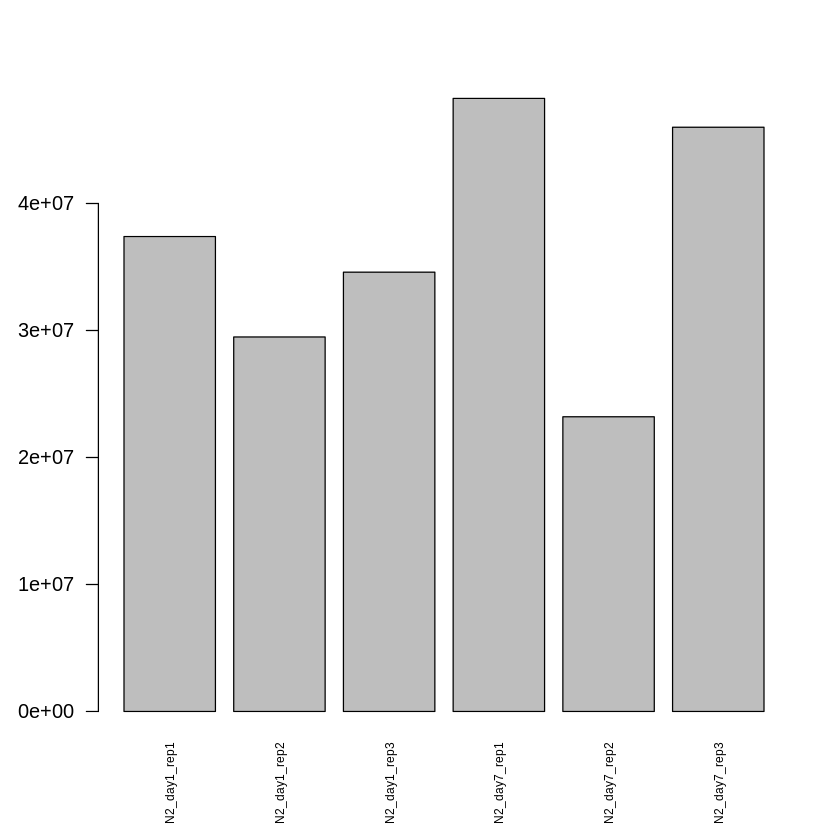

In [21]:
barplot(colSums(merged_df),
         las = 2,
         cex.names= 0.6)

In [22]:
# inkscape: an open source software for editing the graph saved in pdf
pdf("total_count_barplot.pdf")
barplot(colSums(merged_df),
         las = 2,
         cex.names= 0.6)
dev.off()

agg_record_854642287 
                   2

In [23]:
coldata <- colnames(merged_df)
coldata_df <- cbind(group = gsub("_rep\\d", "", coldata))
coldata_df

group
N2_day1
N2_day1
N2_day1
N2_day7
N2_day7
N2_day7


In [24]:
rownames(coldata_df) = coldata
coldata_df

,group
N2_day1_rep1,N2_day1
N2_day1_rep2,N2_day1
N2_day1_rep3,N2_day1
N2_day7_rep1,N2_day7
N2_day7_rep2,N2_day7
N2_day7_rep3,N2_day7


## Instsall required R packages


In [1]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("DESeq2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘XVector’, ‘formatR’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘Seqinfo’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘MatrixGenerics’, ‘RcppArmadillo’


Old packages: 'xfun'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30

In [16]:
if (!requireNamespace("remotes", quietly = TRUE))
    install.packages("remotes")

remotes::install_github("kevinblighe/EnhancedVolcano")

ggrepel (NA -> 0.9.6) [CRAN]


Installing 1 packages: ggrepel

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpDRoCry/remotes3121fb93b3/kevinblighe-EnhancedVolcano-ab0428e/DESCRIPTION’ ... OK
* preparing ‘EnhancedVolcano’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘EnhancedVolcano_1.13.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Load R packages

In [17]:
library(DESeq2)
library(EnhancedVolcano)

Loading required package: ggplot2

Loading required package: ggrepel



## Run DESeq2 to identify DEG

In [25]:
dds <- DESeqDataSetFromMatrix(countData = merged_df,
                              colData = coldata_df,
                              design =~ group)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [26]:
class(dds)

[1] "DESeqDataSet"
attr(,"package")
[1] "DESeq2"

The `DESeq()` function normalizes the read counts,estimates dispersions, and fits the linear model, all in one go.

In [27]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



Dispersion is a measure of spread or variability in the data. Variance, standard deviation, IQR, among other measures, can all be used to measure dispersion.

DESeq2 uses a specific measure of dispersion (α) related to the mean (μ) and variance of the data: Var = μ + α*μ^2.



In [28]:
sizeFactors(dds)

N2_day1_rep1 N2_day1_rep2 N2_day1_rep3 N2_day7_rep1 N2_day7_rep2 N2_day7_rep3 
   1.0023611    0.8107368    0.9447817    1.3118992    0.7154610    1.4260092

In [29]:
head(counts(dds,  normalized = TRUE))

,N2_day1_rep1,N2_day1_rep2,N2_day1_rep3,N2_day7_rep1,N2_day7_rep2,N2_day7_rep3
WBGene00000001,3219.3986,2674.1107,2740.3156,4313.59368,3660.57703,3673.8895
WBGene00000002,269.3640,250.3895,281.5465,270.60006,266.96075,298.0346
WBGene00000003,340.1968,511.8800,435.0211,294.99218,356.41357,349.9276
WBGene00000004,582.6243,540.2493,548.2748,783.59680,756.15585,622.7169
WBGene00000005,382.0978,487.2111,511.2292,90.70819,90.85052,132.5377
WBGene00000006,342.1920,424.3054,353.5208,157.02426,159.33783,154.2767


The function `plotDispEsts` shows the dispersion by mean of normalized counts. We expect the dispersion to decrease as the mean of normalized counts increases.

The functions shows:

1. black per-gene dispersion estimates

2. a red trend line representing the global relationship between dispersion and normalized count

3. blue 'shrunken' values moderating individual dispersion estimates by the global relationship

4. blue-circled dispersion outliers with high gene-wise dispersion that were not adjusted.


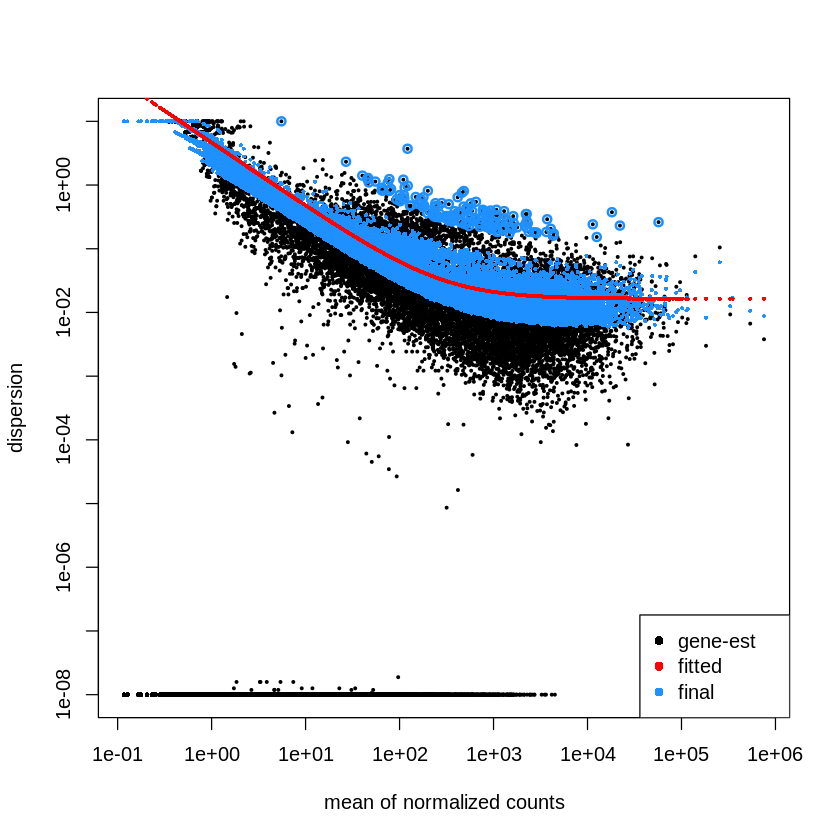

In [30]:
plotDispEsts(dds)

### Plot normalized genes

The function `plotCounts` is used to plot normalized counts plus a pseudocount of 0.5 by default.

In [31]:
vsd <- vst(dds, blind=FALSE)

In [32]:
class(vsd)

[1] "DESeqTransform"
attr(,"package")
[1] "DESeq2"

using ntop=500 top features by variance



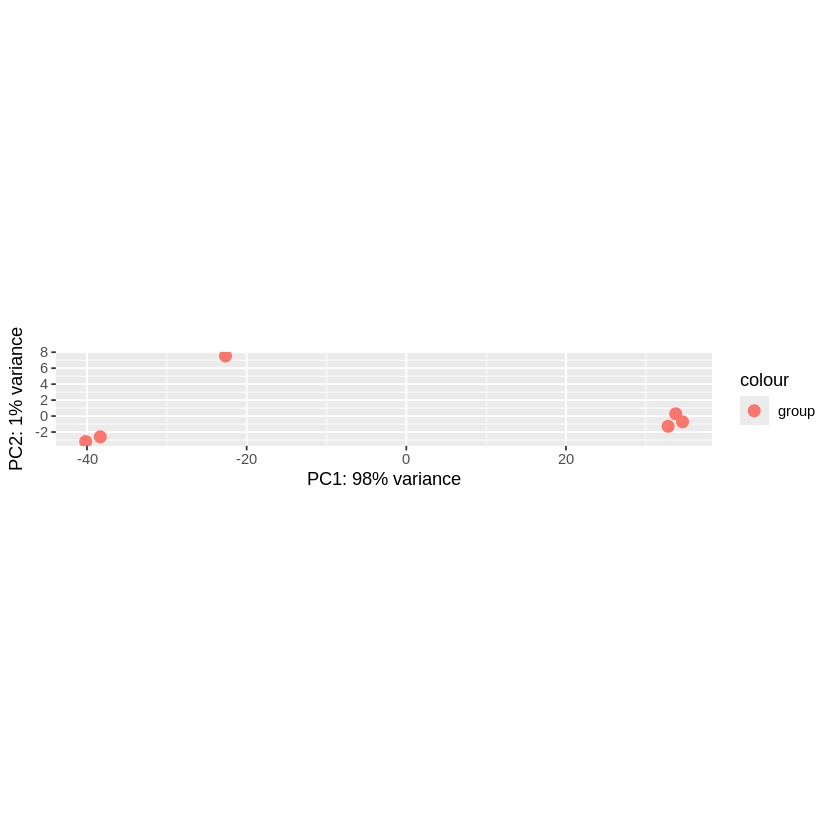

In [33]:
plotPCA(vsd, intgroup = c("group"))

### Extract DEG results using `results` function


In [34]:
res <- results(dds)
res

log2 fold change (MLE): group N2 day7 vs N2 day1 
Wald test p-value: group N2 day7 vs N2 day1 
DataFrame with 46926 rows and 6 columns
                baseMean log2FoldChange     lfcSE      stat      pvalue
               <numeric>      <numeric> <numeric> <numeric>   <numeric>
WBGene00000001  3380.314      0.4320800  0.136502  3.165370 1.54886e-03
WBGene00000002   272.816      0.0620929  0.165747  0.374626 7.07939e-01
WBGene00000003   381.405     -0.3623262  0.199673 -1.814594 6.95864e-02
WBGene00000004   638.936      0.3698102  0.151232  2.445312 1.44727e-02
WBGene00000005   282.439     -2.1244976  0.227771 -9.327337 1.08564e-20
...                  ...            ...       ...       ...         ...
WBGene00306078  0.566369       0.947326  3.076775  0.307896 7.58162e-01
WBGene00306080  0.243919       1.429602  4.042905  0.353608 7.23633e-01
WBGene00306081 27.265033      -3.108820  0.627823 -4.951747 7.35501e-07
WBGene00306121 14.219195      -0.210100  0.691162 -0.303981 7.61142e-01
W

In [35]:
class(res)

[1] "DESeqResults"
attr(,"package")
[1] "DESeq2"

In [36]:
mcols(res)$description

[1] "mean of normalized counts for all samples"       
[2] "log2 fold change (MLE): group N2 day7 vs N2 day1"
[3] "standard error: group N2 day7 vs N2 day1"        
[4] "Wald statistic: group N2 day7 vs N2 day1"        
[5] "Wald test p-value: group N2 day7 vs N2 day1"     
[6] "BH adjusted p-values"

* `baseMean`: mean of normalized counts for all samples
* `log2FoldChange`: log2 fold change
* `lfcSE`: standard error
* `stat`: Wald statistic
* `pvalue`: Wald test p-value
* `padj`: BH adjusted p-values

If we used the p-value directly from the Wald test with a significance cut-off of p < 0.05, that means there is a 5% chance it is a false positives. Each p-value is the result of a single test (single gene). The more genes we test, the more we inflate the false positive rate. This is the multiple testing problem. For example, if we test 20,000 genes for differential expression, at p < 0.05 we would expect to find 1,000 genes by chance. If we found 3000 genes to be differentially expressed total, roughly one third of our genes are false positives. We would not want to sift through our “significant” genes to identify which ones are true positives.

DESeq2 helps reduce the number of genes tested by removing those genes unlikely to be significantly DE prior to testing, such as those with low number of counts and outlier samples (gene-level QC). However, we still need to correct for multiple testing to reduce the number of false positives, and there are a few common approaches:

1. Bonferroni: The adjusted p-value is calculated by: p-value * m (m = total number of tests). This is a very conservative approach with a high probability of false negatives, so is generally not recommended.

2. FDR/Benjamini-Hochberg: Benjamini and Hochberg (1995) defined the concept of FDR and created an algorithm to control the expected FDR below a specified level given a list of independent p-values. An interpretation of the BH method for controlling the FDR is implemented in DESeq2 in which we rank the genes by p-value, then multiply each ranked p-value by m/rank.

3. Q-value / Storey method: The minimum FDR that can be attained when calling that feature significant. For example, if gene X has a q-value of 0.013 it means that 1.3% of genes that show p-values at least as small as gene X are false positives
In DESeq2, the p-values attained by the Wald test are corrected for multiple testing using the Benjamini and Hochberg method by default. There are options to use other methods in the results() function. The p-adjusted values should be used to determine significant genes. The significant genes can be output for visualization and/or functional analysis.

So what does FDR < 0.05 mean? By setting the FDR cutoff to < 0.05, we’re saying that the proportion of false positives we expect amongst our differentially expressed genes is 5%. For example, if you call 500 genes as differentially expressed with an FDR cutoff of 0.05, you expect 25 of them to be false positives.

Note on p-values set to `NA`: some values in the results table can be set to `NA` for one of the following reasons:

1. If within a row, all samples have zero counts, the baseMean column will be zero, and the log2 fold change estimates, p value and adjusted p value will all be set to NA.

2. If a row contains a sample with an extreme count outlier then the p value and adjusted p value will be set to NA. These outlier counts are detected by Cook’s distance. Customization of this outlier filtering and description of functionality for replacement of outlier counts and refitting is described below

3. If a row is filtered by automatic independent filtering, for having a low mean normalized count, then only the adjusted p value will be set to NA. Description and customization of independent filtering is described below

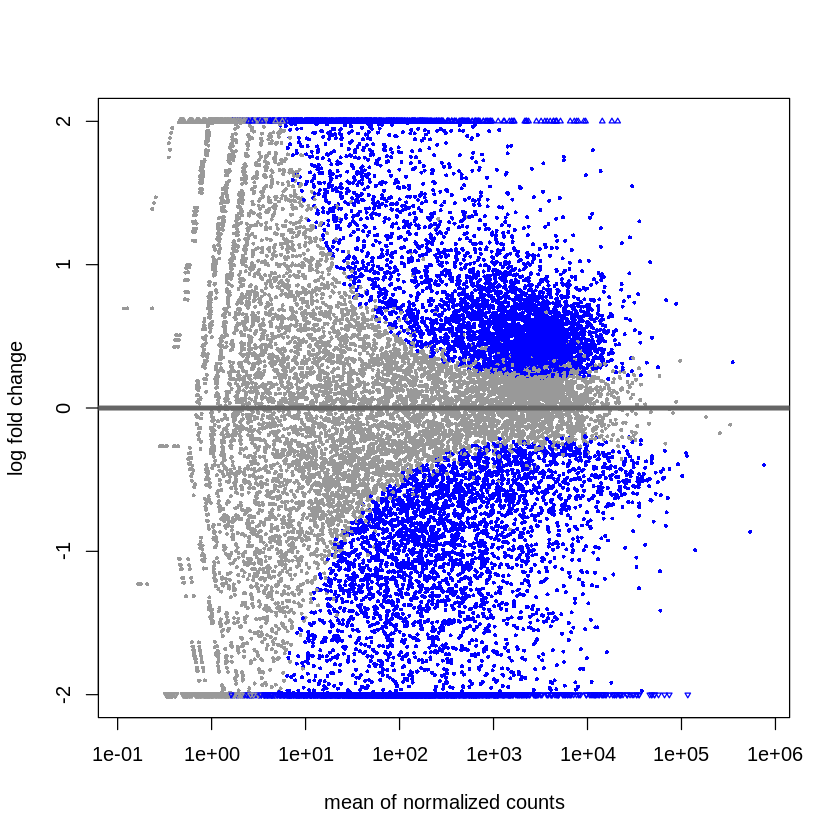

In [37]:
plotMA(res, ylim=c(-2,2))


In [38]:
write.csv(res, file = "BIOI_bulkRNAseq_SE_DESeq2_res.csv")

In [39]:
d <- plotCounts(dds, gene=which.min(res$padj), intgroup="group",
                returnData=TRUE)

In [40]:
d

,count,group
,<dbl>,<fct>
N2_day1_rep1,37716.448,N2_day1
N2_day1_rep2,46554.449,N2_day1
N2_day1_rep3,45402.524,N2_day1
N2_day7_rep1,1544.064,N2_day7
N2_day7_rep2,1564.527,N2_day7
N2_day7_rep3,1489.270,N2_day7


In [41]:
which.min(res$padj)

[1] 465

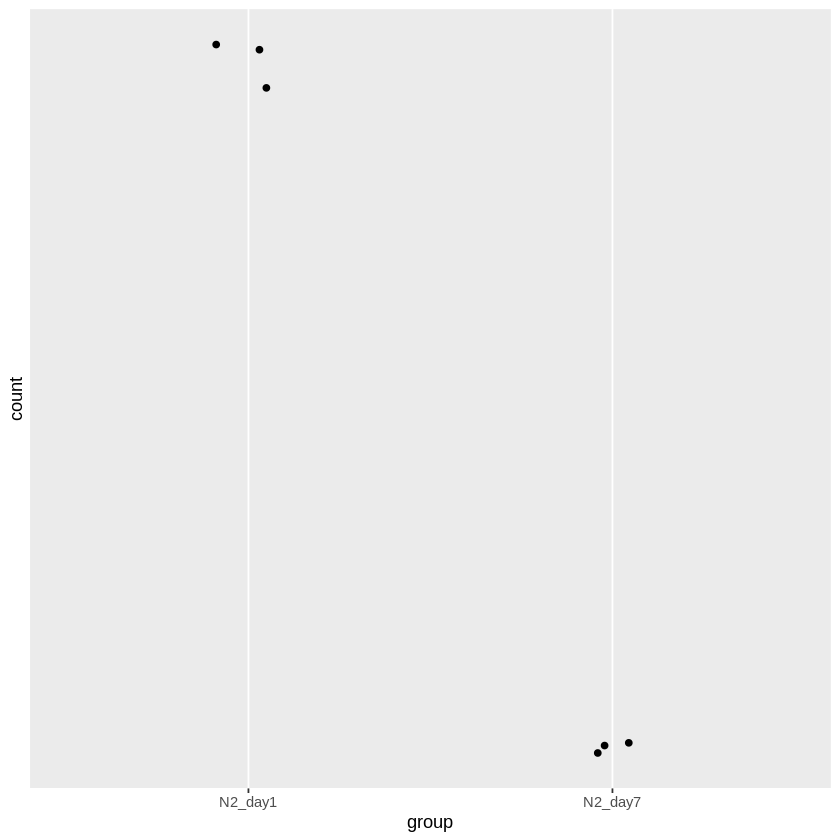

In [42]:
library("ggplot2")
ggplot(d, aes(x=group, y=count)) +
  geom_point(position=position_jitter(w=0.1,h=0)) +
  scale_y_log10(breaks=c(25,100,400))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the EnhancedVolcano package.
  Please report the issue to the authors.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
ℹ The deprecated feature was likely used in the EnhancedVolcano package.
  Please report the issue to the authors.”


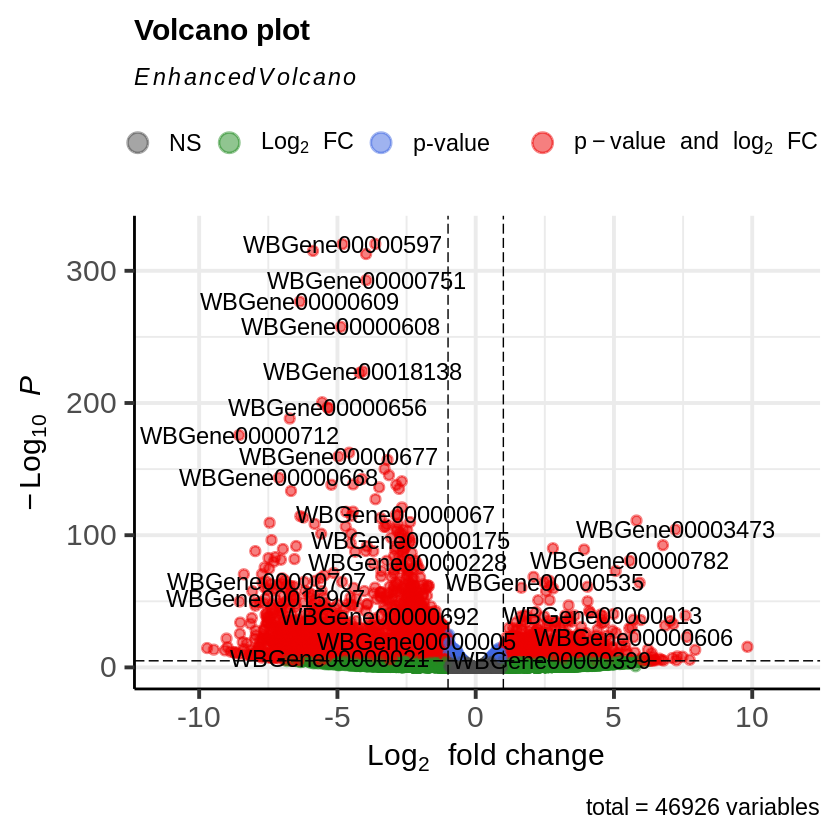

In [43]:
  EnhancedVolcano(res,
    lab = rownames(res),
    x = 'log2FoldChange',
    y = 'pvalue')

## Understand normalized count in DESeq2 (Optional)

####  Create a pseudo-reference sample (row-wise geometric mean)

 The code below creates a new column called `pseudo_reference` that contains the average log-transformed expression value for each gene across all samples. This pseudo-reference is similar to calculating a "reference sample" to compare other samples.

In [44]:
log_data = log(merged_df)
head(log_data)

,N2_day1_rep1,N2_day1_rep2,N2_day1_rep3,N2_day7_rep1,N2_day7_rep2,N2_day7_rep3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WBGene00000001,8.079308,7.681560,7.859027,8.641002,7.870548,8.563886
WBGene00000002,5.598422,5.313206,5.583496,5.872118,5.252273,6.052089
WBGene00000003,5.831882,6.028279,6.018593,5.958425,5.541264,6.212606
WBGene00000004,6.369901,6.082219,6.249975,6.935370,6.293419,6.788972
WBGene00000005,5.948035,5.978886,6.180017,4.779123,4.174387,5.241747
WBGene00000006,5.837730,5.840642,5.811141,5.327876,4.736198,5.393628


In [45]:
library(dplyr)
library(tibble) # rownames_to_column

log_data = log_data %>%
             rownames_to_column('gene') %>%
             mutate (pseudo_reference = rowMeans(log_data))

head(log_data)

,gene,N2_day1_rep1,N2_day1_rep2,N2_day1_rep3,N2_day7_rep1,N2_day7_rep2,N2_day7_rep3,pseudo_reference
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,WBGene00000001,8.079308,7.681560,7.859027,8.641002,7.870548,8.563886,8.115889
2,WBGene00000002,5.598422,5.313206,5.583496,5.872118,5.252273,6.052089,5.611934
3,WBGene00000003,5.831882,6.028279,6.018593,5.958425,5.541264,6.212606,5.931841
4,WBGene00000004,6.369901,6.082219,6.249975,6.935370,6.293419,6.788972,6.453309
5,WBGene00000005,5.948035,5.978886,6.180017,4.779123,4.174387,5.241747,5.383699
6,WBGene00000006,5.837730,5.840642,5.811141,5.327876,4.736198,5.393628,5.491203


In [46]:
table(log_data$pseudo_reference == "-Inf")


FALSE  TRUE 
16951 29975 

In [47]:
filtered_log_data = log_data %>% filter(pseudo_reference != "-Inf")
head(filtered_log_data)

,gene,N2_day1_rep1,N2_day1_rep2,N2_day1_rep3,N2_day7_rep1,N2_day7_rep2,N2_day7_rep3,pseudo_reference
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,WBGene00000001,8.079308,7.681560,7.859027,8.641002,7.870548,8.563886,8.115889
2,WBGene00000002,5.598422,5.313206,5.583496,5.872118,5.252273,6.052089,5.611934
3,WBGene00000003,5.831882,6.028279,6.018593,5.958425,5.541264,6.212606,5.931841
4,WBGene00000004,6.369901,6.082219,6.249975,6.935370,6.293419,6.788972,6.453309
5,WBGene00000005,5.948035,5.978886,6.180017,4.779123,4.174387,5.241747,5.383699
6,WBGene00000006,5.837730,5.840642,5.811141,5.327876,4.736198,5.393628,5.491203


In [48]:
filtered_log_data$pseudo_reference = exp(filtered_log_data$pseudo_reference)

In [49]:
head(filtered_log_data)

,gene,N2_day1_rep1,N2_day1_rep2,N2_day1_rep3,N2_day7_rep1,N2_day7_rep2,N2_day7_rep3,pseudo_reference
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,WBGene00000001,8.079308,7.681560,7.859027,8.641002,7.870548,8.563886,3347.2307
2,WBGene00000002,5.598422,5.313206,5.583496,5.872118,5.252273,6.052089,273.6730
3,WBGene00000003,5.831882,6.028279,6.018593,5.958425,5.541264,6.212606,376.8478
4,WBGene00000004,6.369901,6.082219,6.249975,6.935370,6.293419,6.788972,634.7996
5,WBGene00000005,5.948035,5.978886,6.180017,4.779123,4.174387,5.241747,217.8266
6,WBGene00000006,5.837730,5.840642,5.811141,5.327876,4.736198,5.393628,242.5487


In [50]:
dim(log_data)
dim(filtered_log_data)

[1] 46926     8

[1] 16951     8

### Calculate ratio between each sample and the pseudo-reference for each gene

 This step calculates the fold change between each sample and the pseudo-reference for each gene.


In [51]:
ratio_data = sweep(exp(filtered_log_data[,2:7]), 1, filtered_log_data[,8], "/")
head(ratio_data)

,N2_day1_rep1,N2_day1_rep2,N2_day1_rep3,N2_day7_rep1,N2_day7_rep2,N2_day7_rep3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9640805,0.6476996,0.7734752,1.6906513,0.7824378,1.5651745
2,0.9865787,0.7417610,0.9719628,1.2971683,0.6979131,1.5529480
3,0.9048746,1.1012403,1.0906259,1.0269398,0.6766657,1.3241420
4,0.9199753,0.6899815,0.8160055,1.6194086,0.8522374,1.3988666
5,1.7582795,1.8133692,2.2173603,0.5463062,0.2984025,0.8676627
6,1.4141490,1.4182718,1.3770430,0.8493139,0.4700087,0.9070343


### Calculate  scaling factor

The code below computes the median fold change for each sample across all genes.

In [54]:
scaling_factors = apply(ratio_data, 2, median, na.rm = TRUE)
scaling_factors

N2_day1_rep1 N2_day1_rep2 N2_day1_rep3 N2_day7_rep1 N2_day7_rep2 N2_day7_rep3 
   1.0023611    0.8107368    0.9447817    1.3118992    0.7154610    1.4260092


The `2` indicates that the function is applied to columns, i.e., for each sample.

### Normalize the counts

This step below normalizes each sample by its scaling factors, making the data comparable across samples. The result is a normalized gene expression matrix.

In [55]:
manually_normalized = sweep(merged_df, 2, scaling_factors, "/")
head(manually_normalized)

,N2_day1_rep1,N2_day1_rep2,N2_day1_rep3,N2_day7_rep1,N2_day7_rep2,N2_day7_rep3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WBGene00000001,3219.3986,2674.1107,2740.3156,4313.59368,3660.57703,3673.8895
WBGene00000002,269.3640,250.3895,281.5465,270.60006,266.96075,298.0346
WBGene00000003,340.1968,511.8800,435.0211,294.99218,356.41357,349.9276
WBGene00000004,582.6243,540.2493,548.2748,783.59680,756.15585,622.7169
WBGene00000005,382.0978,487.2111,511.2292,90.70819,90.85052,132.5377
WBGene00000006,342.1920,424.3054,353.5208,157.02426,159.33783,154.2767


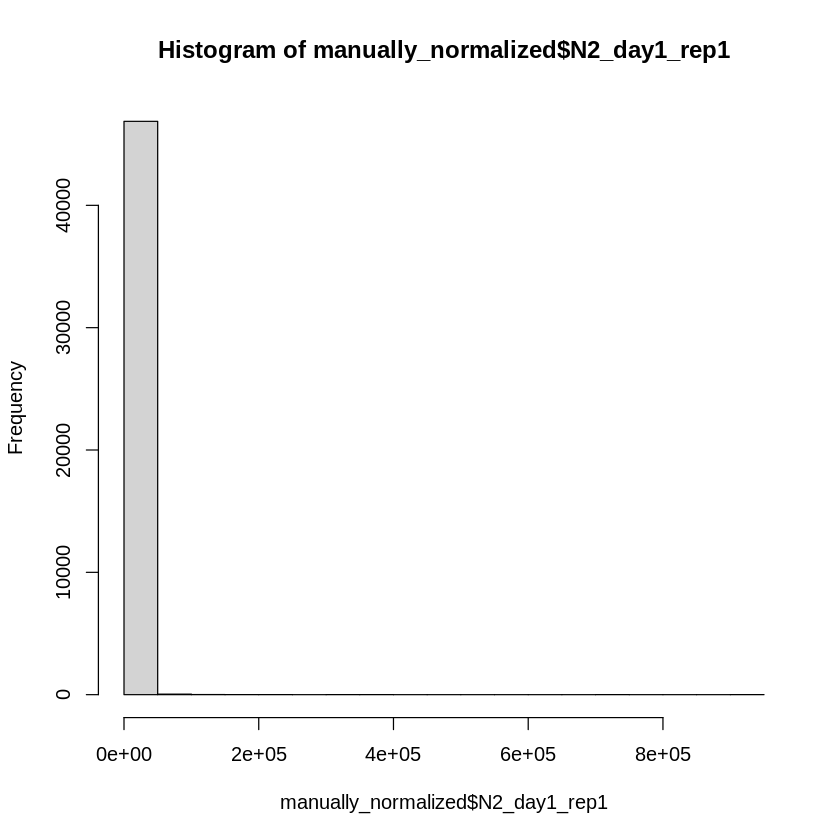

In [56]:
hist(manually_normalized$N2_day1_rep1)

The code below shows that the size factors and the normalized read counts calculated by ourselves are the same as what DESeq2 function returns.

In [57]:
head(counts(dds,  normalized = TRUE))


,N2_day1_rep1,N2_day1_rep2,N2_day1_rep3,N2_day7_rep1,N2_day7_rep2,N2_day7_rep3
WBGene00000001,3219.3986,2674.1107,2740.3156,4313.59368,3660.57703,3673.8895
WBGene00000002,269.3640,250.3895,281.5465,270.60006,266.96075,298.0346
WBGene00000003,340.1968,511.8800,435.0211,294.99218,356.41357,349.9276
WBGene00000004,582.6243,540.2493,548.2748,783.59680,756.15585,622.7169
WBGene00000005,382.0978,487.2111,511.2292,90.70819,90.85052,132.5377
WBGene00000006,342.1920,424.3054,353.5208,157.02426,159.33783,154.2767


In [58]:
sizeFactors(dds)

N2_day1_rep1 N2_day1_rep2 N2_day1_rep3 N2_day7_rep1 N2_day7_rep2 N2_day7_rep3 
   1.0023611    0.8107368    0.9447817    1.3118992    0.7154610    1.4260092

## SessionInfo

In [59]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] tibble_3.3.0                EnhancedVolcano_1.13.2     
 [3] ggrepel_0.9.6               ggplot2_4.0.0              
 [5] DESeq2_1.50.0               Summarized